# Huấn luyện và đánh giá mô hình

## 1. Import thư viện và đọc dữ liệu

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import numpy as np
from preprocessing import fill_missing, one_hot_encoding, create_features_and_target

%matplotlib inline

In [ ]:
train = pd.read_csv("house_prices/train.csv")
test = pd.read_csv("house_prices/test.csv") # test set này k có SalePrice (ta cần dự đoán cho ra kết quả của cuộc thi)

## 2. Preprocessing

### 2.1. Kiểm tra missing data

In [114]:
print(f"Tổng số missing data ban đầu trong training set: {train.isnull().sum().sum()}")
print(f"Tổng số missing data ban đầu trong test set: {test.isnull().sum().sum()}")

Tổng số missing data ban đầu trong training set: 7829
Tổng số missing data ban đầu trong test set: 7878


### 2.2. Điền missing data

In [115]:
train = fill_missing(train)
test = fill_missing(test)

In [116]:
print(f"Tổng số missing data hiện tại trong training set: {train.isnull().sum().sum()}")
print(f"Tổng số missing data hiện tại trong test set: {test.isnull().sum().sum()}")

Tổng số missing data hiện tại trong training set: 0
Tổng số missing data hiện tại trong test set: 0


### 2.3. Căn chỉnh cột cho training set và test set

In [117]:
train, test = one_hot_encoding(train, test)

### 2.4. Chia features và target

In [118]:
X_full_train, y_full_train = create_features_and_target(train)

### 2.5. Feature Scaling

In [119]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_full_train = scaler.fit_transform(X_full_train)

### 2.6. Từ training set tạo cross-validation set và test set dùng để đánh giá mô hình

In [120]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_full_train, y_full_train, test_size=0.2, random_state=42)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [121]:
print(f'X_train.shape: {X_train.shape}')
print(f'X_cv.shape:    {X_cv.shape}')
print(f'X_test.shape:  {X_test.shape}')

X_train.shape: (876, 304)
X_cv.shape:    (292, 304)
X_test.shape:  (292, 304)


## 3. Huấn luyện và đánh giá mô hình

### 3.1. Khởi tạo và huấn luyện mô hình

In [122]:
from sklearn.linear_model import LinearRegression

# Train
model = LinearRegression() # fx = wx+b
model.fit(X_train, y_train)

LinearRegression()

### 3.2. Tạo dự đoán của mô hình (+relu cho thực tế)

In [123]:
# Predict (+ use relu)
y_pred_train = np.maximum(0, model.predict(X_train))
y_pred_cv = np.maximum(0, model.predict(X_cv))
y_pred_test = np.maximum(0, model.predict(X_test))

### 3.3. Tính cost của model (dùng root mean square error)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# RMSE - do giá nhà có đơn vị rõ ràng và lớn
train_rmse = sqrt(mean_squared_error(y_pred_train, y_train))
cv_rmse = sqrt(mean_squared_error(y_pred_cv, y_cv))
test_rmse = sqrt(mean_squared_error(y_pred_test, y_test))

print(f"Train RMSE:  {train_rmse}")
print(f"CV RMSE:     {cv_rmse}")
print(f"Test RMSE:   {test_rmse}")

# MSE của train quá lớn -> high bias
# MSE của train << MSE của test -> high variances

Train RMSE:  17188.550115225367
CV RMSE:     28405.30221595741
Test RMSE:   33119.765040955426


### 3.4. Visualizize model để xem mô hình hoạt động có ổn không 

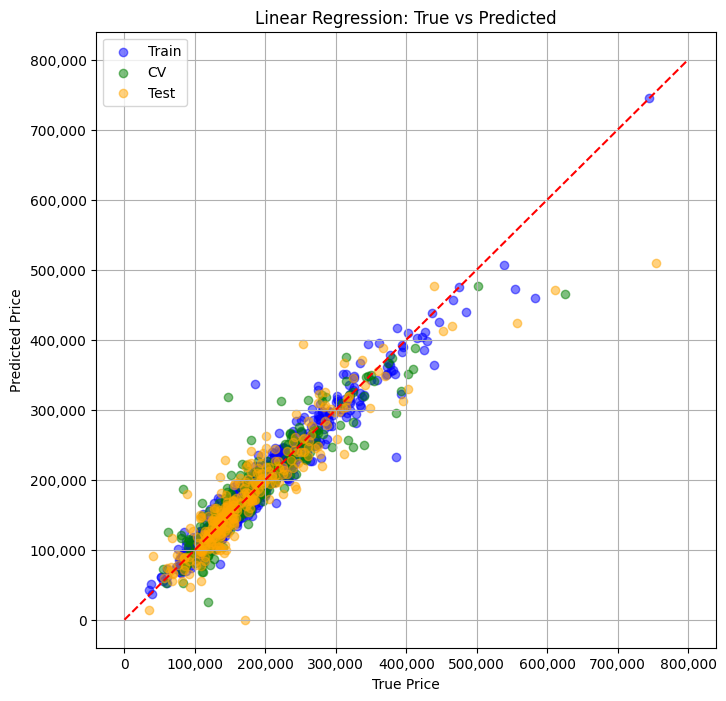

In [125]:
import matplotlib.ticker as ticker
# Plot true vs predicted
plt.figure(figsize=(8, 8)) # tạo biểu đồ có tỷ lệ 8x8 inch

plt.scatter(y_train, y_pred_train, color='blue', alpha=0.5, label='Train')
plt.scatter(y_cv, y_pred_cv, color='green', alpha=0.5, label='CV')
plt.scatter(y_test, y_pred_test, color='orange', alpha=0.5, label='Test')
# dùng biểu đồ tán xạ (scatter plot)
# ~ .scatter(x, y, alpha=?)
# ~ alpha=0.6: làm điểm trong suốt một chút -> dễ nhìn khi trùng nhau

plt.plot([0, 800000], [0, 800000], 'r--')
# Vẽ đường chéo lý tưởng mà trên đó mọi điểm (True Price, Predicted Price) sẽ nằm nếu mô hình dự đoán hoàn toàn chính xác.
# Khi mà Pridicted Price (trục y) == True Price (trục x)
# ~ plt.plot(x, y, style)
# ~ x: x1, x2 (ở đây là [0, 800000])
# ~ y: y1, y2 (ở đây là [0, 800000])
# ~ -> (x1, y1) = (0, 0)
# ~ -> (x2, y2) = (800000, 800000)
# ~ => đường 45*
#
# ~ 'r--': 'r': màu đỏ (red) + '--': kiểu đường gạch đứt đoạn

plt.xlabel('True Price')
plt.ylabel('Predicted Price')
# Đặt tên trục x và y

# Tắt số dạng khoa học cho trục y và x
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{int(y):,}'))
# plt.gca()
# → "Get current axis"
# → Lấy cái biểu đồ hiện tại đang vẽ (cụ thể là axes để chỉnh sâu hơn)
#
# .xaxis.set_major_formatter(...)
# → Cài lại cách hiển thị số ở trục X.
# → Tương tự cho .yaxis là trục Y.
#
# ticker.FuncFormatter(...)
# → Tạo 1 hàm custom để format số theo ý bạn.
# → Bạn truyền vào 1 hàm lambda.
#
# lambda x, _: f'{int(x):,}'
# → Hàm này nhận số x (số trên trục), rồi:
# int(x): ép thành số nguyên (khỏi lẻ).
# :,: format có dấu phẩy ngăn cách hàng nghìn.
# Ví dụ: 3557600 → "3,557,600"
# → _ là tham số bắt buộc thứ 2 mà FuncFormatter yêu cầu, nhưng ta không dùng tới nên đặt _.

plt.legend()
# Chú thích (theo label)

plt.title('Linear Regression: True vs Predicted')
# Đặt tên biểu đồ 

plt.grid(True)
# Hiện lưới nền trên biểu đồ -> giúp dễ đọc số liệu hơn

plt.show()